In [2]:
#Task 2
from scipy import misc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import matplotlib.image as mpimg
import random as rnd
import matplotlib.mlab as mlab
from skimage import io, color


%matplotlib inline
    

img = mpimg.imread('./HW1/Images/Q2/colorful2.jpg')
img_2 = mpimg.imread('./HW1/Images/Q2/colorful3.jpg')


1) Color Quantization Function (# of Clusters K as input)

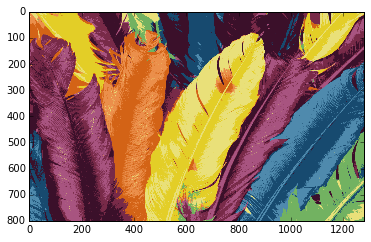

In [3]:
def quantization(img,k): 
    
    
    #Sets up image for KMEANS, by getting 2d sample
    width, height, depth = original_shape = tuple(img.shape)
    img_array = np.reshape(np.array(img,dtype=np.float64)/255, (width*height, depth))
    img_array_sample = shuffle(img_array, random_state=0)[:1000]
    
    
    
    #Performs KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_array_sample)
    labels = kmeans.predict(img_array)
    new_img = np.zeros((width,height,kmeans.cluster_centers_.shape[1]))
    
    
    #Regenerates the image
    label_index = 0
    for i in range(width):
        for j in range(height):
            new_img[i][j] = kmeans.cluster_centers_[labels[label_index]]
            label_index += 1
    plt.imshow(new_img)

    pass

quantization(img,10)


2)RGB to LAB and back

In [4]:
def labQuantization(img,k):
    
    #To Lab 
    lab = color.rgb2lab(img)
    
    #Quantizes L-channel only
    lab_L = lab[:,:,0]
    width, height = original_shape = tuple(lab_L.shape)
    lab_array = np.array(lab_L,dtype=np.float64)/255
    lab_array_sample = shuffle(lab_array, random_state=0)[:2000]
    
    #Performs KMeans 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(lab_array_sample)
    labels = kmeans.predict(lab_array)
    new_L = np.zeros((width,height))
    
    label_idx = 0
    
    print(kmeans.cluster_centers_.shape)
    for i in range(width-1):
            new_L[i] = kmeans.cluster_centers_[labels[label_idx]]
            label_idx += 1

    
    #Adds Quantized L-channel to orignal Converts back
    new_LAB = np.zeros((width,height,3))
    for x in range(width-1):
        for y in range(height-1):
            new_LAB[x][y][0] = new_L[x][y]
            new_LAB[x][y][1] = lab[x][y][1]
            new_LAB[x][y][2] = lab[x][y][2]
            
    
    
    new_img = color.lab2rgb(new_LAB)
    #plt.imshow(new_img)
    return new_img

labQuantization(img,10)

(10, 1280)


/Users/jeffponnor/anaconda/lib/python2.7/site-packages/skimage/color/colorconv.py:864: UserWarning: Color data out of range: Z < 0 in 424568 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


array([[[ 0.15365683,  0.        ,  0.        ],
        [ 0.1500885 ,  0.        ,  0.        ],
        [ 0.1431139 ,  0.        ,  0.        ],
        ..., 
        [ 0.01944278,  0.02517624,  0.        ],
        [ 0.02172556,  0.02437379,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.15765773,  0.        ,  0.        ],
        [ 0.15981427,  0.        ,  0.        ],
        [ 0.15556577,  0.        ,  0.        ],
        ..., 
        [ 0.01092942,  0.02772266,  0.        ],
        [ 0.00036043,  0.03076428,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.16801712,  0.        ,  0.        ],
        [ 0.16518192,  0.        ,  0.        ],
        [ 0.16102291,  0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.0340193 ,  0.        ],
        [ 0.        ,  0.037166  ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ..., 
       [[ 0.        ,  0.03735446,  0.10580411],
        

3)SSD between two RGB images

In [7]:
def ssd(img1,img2):
    sum = 0 
    for i in range(len(img1)):
        for j in range(len(img1[i])):
            for k in range(len(img1[i][j])):
                sum = sum + ((img1[i][j][k]-img2[i][j][k])*(img1[i][j][k]-img2[i][j][k]))

    print "The sum of squared distances between the two images is ", sum, "."
 
    pass

ssd(img,img)

The sum of squared distances between the two images is  0 .


4)Histogram Generation

(10, 1280)
(20, 1280)


(array([[[  3.92978502,  17.62414751,   6.20978102],
         [  3.77041969,  16.90933389,   5.95795457],
         [  3.4699756 ,  15.5619217 ,   5.48319781],
         ..., 
         [  1.54789819,  -1.27508532,   2.29495927],
         [  1.54171778,  -1.04090001,   2.29000608],
         [  0.        ,   0.        ,   0.        ]],
 
        [[  4.11306305,  18.41922275,   6.49939392],
         [  4.21387889,  18.83656556,   6.65870143],
         [  4.016624  ,  18.00687024,   6.34700253],
         ..., 
         [  1.54863584,  -2.10287442,   2.28085182],
         [  1.54356897,  -3.11831921,   2.25460201],
         [  0.        ,   0.        ,   0.        ]],
 
        [[  4.6104382 ,  20.35217552,   7.28533787],
         [  4.47101902,  19.84120146,   7.06502999],
         [  4.27100525,  19.06703097,   6.74897156],
         ..., 
         [  1.70096057,  -3.47483128,   2.4837864 ],
         [  1.85829488,  -3.79624389,   2.71353   ],
         [  0.        ,   0.        ,   0.      

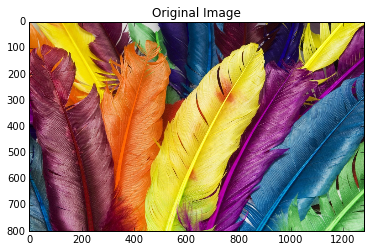

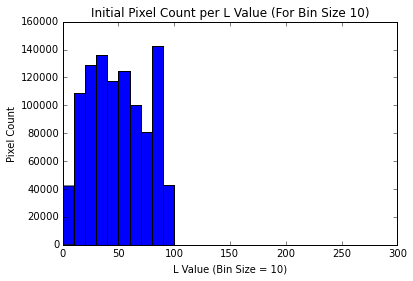

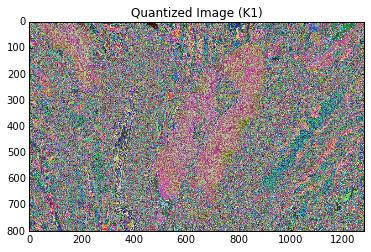

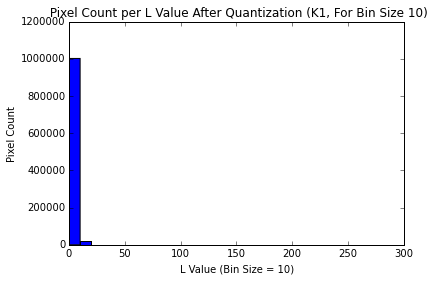

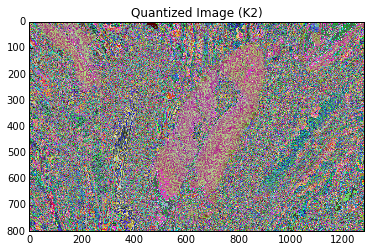

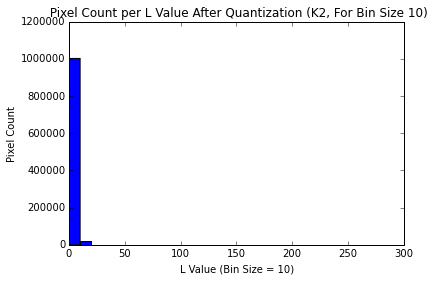

In [15]:
def histogramCreate(img,binsize,k,k2):
    
    #Before Quantization
    lab = color.rgb2lab(img)
    l_data = []
    for i in lab:
        for j in i:
            l_data.append(j[0]);
            
    
    #Display Original Image
    plt.figure(1)
    plt.title('Original Image')
    plt.imshow(img)
    
    
    #Display Original Image's Histogram
    plt.figure(2)
    plt.title('Initial Pixel Count per L Value (For Bin Size 10)')
    plt.xlabel('L Value (Bin Size = 10)')
    plt.ylabel('Pixel Count')
    plt.hist(l_data, bins=range(0,255 + binsize, binsize))

    
    #After Quantization with K1
    lab2 = color.rgb2lab(labQuantization(img,k))
    l_data2 = []
    for i2 in lab2:
        for j2 in i2:
            l_data2.append(j2[0]);
    
    #Display Quantized Image (K1)
    plt.figure(3)
    plt.title('Quantized Image (K1)')
    plt.imshow(lab2)
    
    #Display Quantized Image's (K1) Histogram
    plt.figure(4)
    plt.title(' Pixel Count per L Value After Quantization (K1, For Bin Size 10)')
    plt.xlabel('L Value (Bin Size = 10)')
    plt.ylabel('Pixel Count')
    plt.hist(l_data2, bins=range(0,255 + binsize, binsize))

    
    #After Quantization with K2
    lab3 = color.rgb2lab(labQuantization(img,k2))
    l_data3 = []
    for i3 in lab3:
        for j3 in i3:
            l_data3.append(j3[0]);
    
    #Display Quantized Image (K2)
    plt.figure(5)
    plt.title('Quantized Image (K2)')
    plt.imshow(lab3)
    
    #Display Quantized Image's (K2) Histogram
    plt.figure(6)
    plt.title(' Pixel Count per L Value After Quantization (K2, For Bin Size 10)')
    plt.xlabel('L Value (Bin Size = 10)')
    plt.ylabel('Pixel Count')
    plt.hist(l_data3, bins=range(0,255 + binsize, binsize))
    
    return (lab2,lab3)

histogramCreate(img,10,10,20)


5)Summary

In [16]:
def compareQuantization(img):
    
    #Generate Histogram
    #(Function also returns the LAB image it uses after Quantization)
    print "______________________________________________________"
    #Calculate with k = 10 and 20
    lab_result = histogramCreate(img,10,10,20)
    ssd(img,lab_result[0])
    ssd(img,lab_result[1])
    
    print "______________________________________________________"
    pass



______________________________________________________
(10, 1280)
(20, 1280)
The sum of squared distances between the two images is  52078782666.1 .
The sum of squared distances between the two images is  52077696068.7 .
______________________________________________________


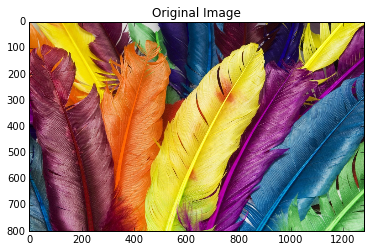

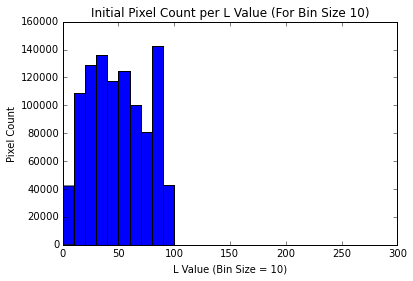

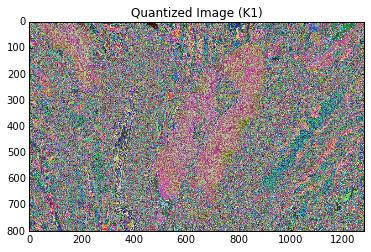

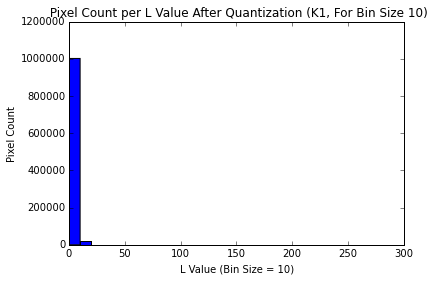

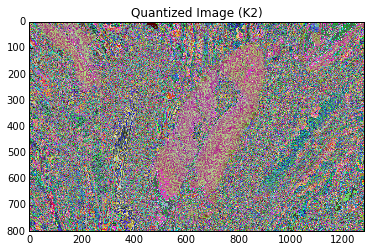

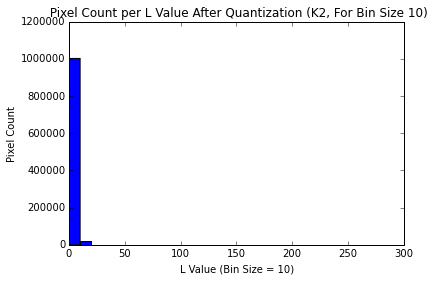

In [17]:
#Compare for Image 1
compareQuantization(img)

______________________________________________________
(10, 494)
(20, 494)
The sum of squared distances between the two images is  5589732187.08 .
The sum of squared distances between the two images is  5589693057.68 .
______________________________________________________


/Users/jeffponnor/anaconda/lib/python2.7/site-packages/skimage/color/colorconv.py:864: UserWarning: Color data out of range: Z < 0 in 63903 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


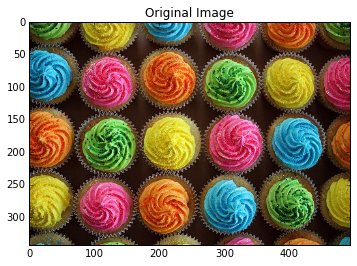

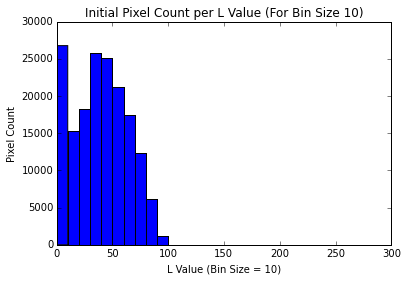

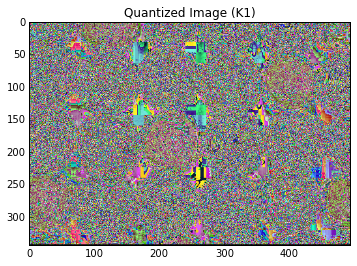

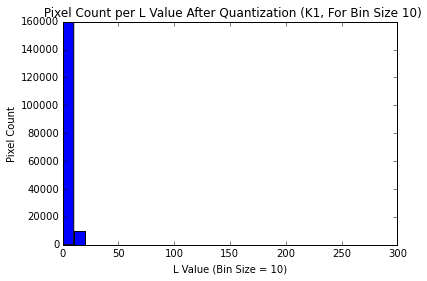

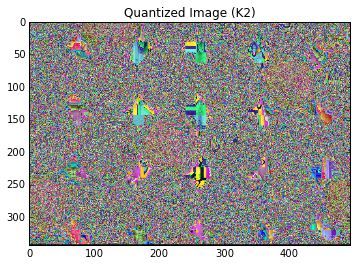

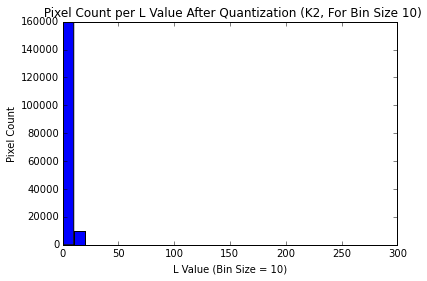

In [18]:
#Compare for Image 2
compareQuantization(img_2)